In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### Months

In [2]:
data = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='months')
print(data)

       Months  Years  Total Accidents  People Killed
0     January   2016             3688            432
1    February   2016             3384            380
2       March   2016             3321            376
3       April   2016             3223            381
4         May   2016             3385            405
5        June   2016             3160            320
6        July   2016             3179            311
7      August   2016             3220            320
8   September   2016             3267            371
9     October   2016             3211            350
10   November   2016             3095            290
11   December   2016             3287            351
12    January   2017             3430            349
13   February   2017             3157            336
14      March   2017             3167            313
15      April   2017             3175            362
16        May   2017             3480            412
17       June   2017             2918         

In [89]:
category_column = data['Months']

label_encoder = LabelEncoder()
label_encoder.fit(category_column)

binary_encoded_data = label_encoder.transform(category_column)

data['binary_label'] = binary_encoded_data
print(data)

       Months  Years  Total Accidents  People Killed  binary_label
0     January   2016             3688            432             4
1    February   2016             3384            380             3
2       March   2016             3321            376             7
3       April   2016             3223            381             0
4         May   2016             3385            405             8
5        June   2016             3160            320             6
6        July   2016             3179            311             5
7      August   2016             3220            320             1
8   September   2016             3267            371            11
9     October   2016             3211            350            10
10   November   2016             3095            290             9
11   December   2016             3287            351             2
12    January   2017             3430            349             4
13   February   2017             3157            336          

In [90]:
r = data.corr(method='pearson')
print(r)

                    Years  Total Accidents  People Killed  binary_label
Years            1.000000        -0.084201      -0.214214       0.00000
Total Accidents -0.084201         1.000000       0.904201      -0.02496
People Killed   -0.214214         0.904201       1.000000      -0.13921
binary_label     0.000000        -0.024960      -0.139210       1.00000


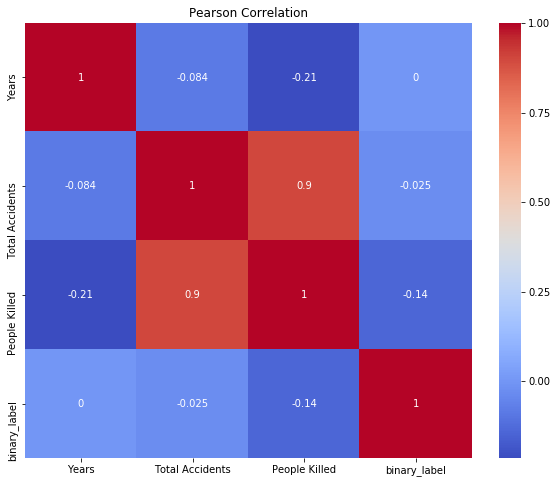

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(r, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Pearson Correlation')

# Display the plot
plt.show()

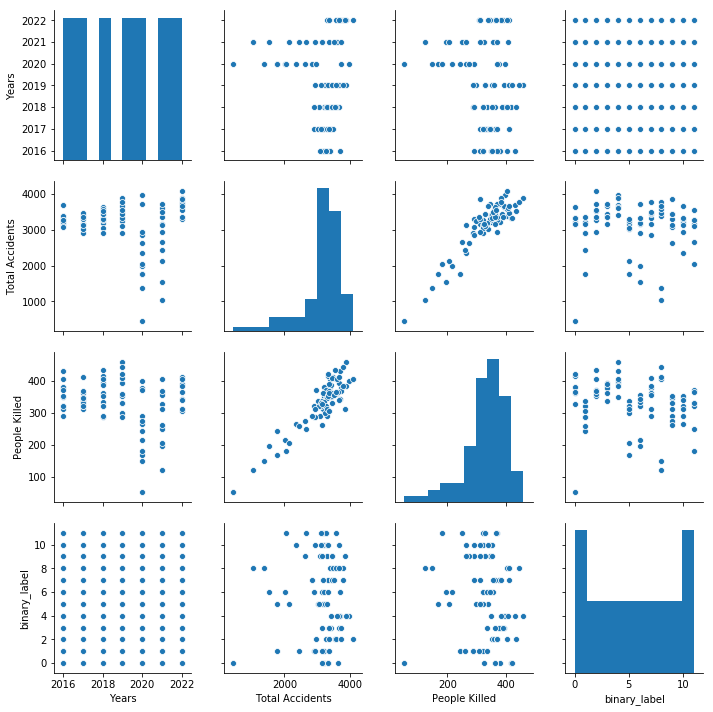

In [93]:
sns.pairplot(data)
plt.show()

In [94]:
#Add a new column 'Next_Year_Number' to represent 'Number' for the next year
data['Next_Year_Number'] = data.groupby('Months')['People Killed'].shift(-1)

# Create the binary target variable 'Arrested' based on the comparison of 'Number' with 'Next_Year_Number'
data['Killed'] = (data['People Killed'] < data['Next_Year_Number']).astype(int)
data['Next_Year_Number'].fillna(0, inplace=True)
print(data)

       Months  Years  Total Accidents  People Killed  binary_label  \
0     January   2016             3688            432             4   
1    February   2016             3384            380             3   
2       March   2016             3321            376             7   
3       April   2016             3223            381             0   
4         May   2016             3385            405             8   
5        June   2016             3160            320             6   
6        July   2016             3179            311             5   
7      August   2016             3220            320             1   
8   September   2016             3267            371            11   
9     October   2016             3211            350            10   
10   November   2016             3095            290             9   
11   December   2016             3287            351             2   
12    January   2017             3430            349             4   
13   February   2017

In [95]:
# Separate the features (X) and target variable (y)
X = data[['Total Accidents','People Killed','binary_label']]
y = data['Killed']

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
results=log_reg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [97]:
# Calculate the R^2 value
r2 = log_reg.score(X_test, y_test)
print("R^2:", r2)

R^2: 0.5882352941176471


In [98]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5882352941176471


In [99]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.7142857142857143


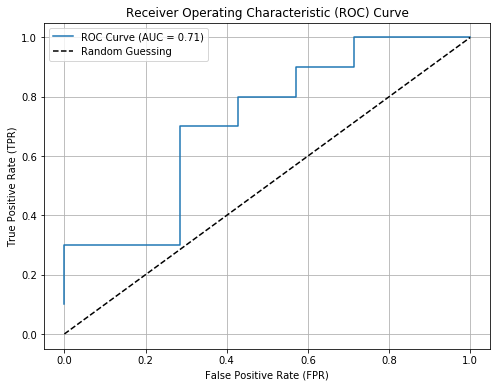

In [100]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7 0]
 [7 3]]


### Districts

In [102]:
df = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='districts')
print(df)

             Districts  Years  Total Accidents  People Killed
0   Thiruvananthapuram   2016             5415            531
1               Kollam   2016             3129            400
2       Pathanamthitta   2016             1632            152
3            Alappuzha   2016             2999            356
4             Kottayam   2016             2684            246
5               Idukki   2016             1130            536
6            Ernakulam   2016             6167            104
7             Thrissur   2016             4261            450
8             Palakkad   2016             2490            366
9           Malappuram   2016             2738            402
10      Kozhikode city   2016             3188            330
11             Wayanad   2016              713             81
12              Kannur   2016             1898            213
13           Kasaragod   2016              976            120
14  Thiruvananthapuram   2017             5259            497
15      

In [103]:
category_column = df['Districts']

label_encoder = LabelEncoder()
label_encoder.fit(category_column)

binary_encoded_data = label_encoder.transform(category_column)

df['binary_label'] = binary_encoded_data
print(df)

             Districts  Years  Total Accidents  People Killed  binary_label
0   Thiruvananthapuram   2016             5415            531            11
1               Kollam   2016             3129            400             5
2       Pathanamthitta   2016             1632            152            10
3            Alappuzha   2016             2999            356             0
4             Kottayam   2016             2684            246             6
5               Idukki   2016             1130            536             2
6            Ernakulam   2016             6167            104             1
7             Thrissur   2016             4261            450            12
8             Palakkad   2016             2490            366             9
9           Malappuram   2016             2738            402             8
10      Kozhikode city   2016             3188            330             7
11             Wayanad   2016              713             81            13
12          

In [104]:
r = df.corr(method='pearson')
print(r)

                    Years  Total Accidents  People Killed  binary_label
Years            1.000000        -0.031450      -0.095675      0.000000
Total Accidents -0.031450         1.000000       0.735258     -0.091286
People Killed   -0.095675         0.735258       1.000000      0.004912
binary_label     0.000000        -0.091286       0.004912      1.000000


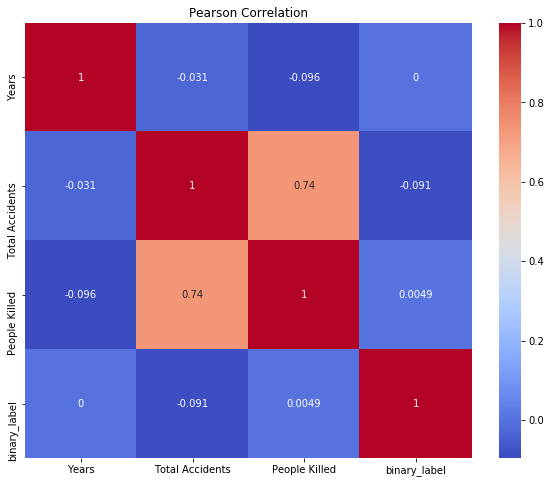

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(r, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Pearson Correlation')

# Display the plot
plt.show()

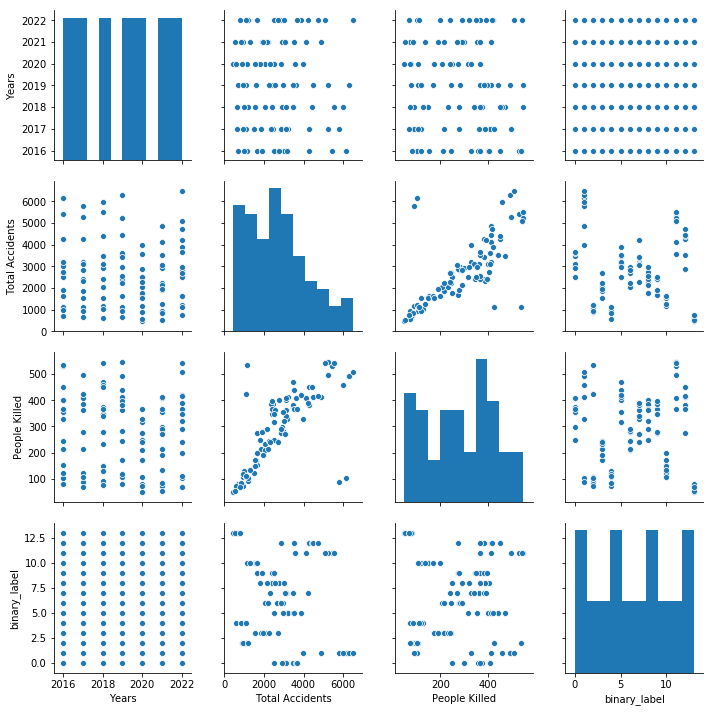

In [106]:
sns.pairplot(df)
plt.show()

In [108]:
#Add a new column 'Next_Year_Number' to represent 'Number' for the next year
df['Next_Year_Number'] = df.groupby('Districts')['People Killed'].shift(-1)

# Create the binary target variable 'Killed' based on the comparison of 'Number' with 'Next_Year_Number'
df['Killed'] = (df['People Killed'] < df['Next_Year_Number']).astype(int)
df['Next_Year_Number'].fillna(0, inplace=True)
print(df)

             Districts  Years  Total Accidents  People Killed  binary_label  \
0   Thiruvananthapuram   2016             5415            531            11   
1               Kollam   2016             3129            400             5   
2       Pathanamthitta   2016             1632            152            10   
3            Alappuzha   2016             2999            356             0   
4             Kottayam   2016             2684            246             6   
5               Idukki   2016             1130            536             2   
6            Ernakulam   2016             6167            104             1   
7             Thrissur   2016             4261            450            12   
8             Palakkad   2016             2490            366             9   
9           Malappuram   2016             2738            402             8   
10      Kozhikode city   2016             3188            330             7   
11             Wayanad   2016              713      

In [109]:
# Separate the features (X) and target variable (y)
X = df[['Years','Total Accidents','People Killed','binary_label']]
y = df['Killed']

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [111]:
# Calculate the R^2 value
r2 = log_reg.score(X_test, y_test)
print("R^2:", r2)

R^2: 0.5


In [112]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [113]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.5274725274725275


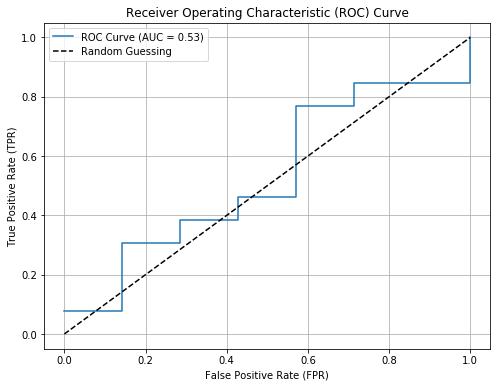

In [114]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5 2]
 [8 5]]


### Vehicles

In [116]:
df1 = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='Vehicles')
print(df1)

                       Vehicles  Years  Total Accidents  People Killed
0                   Two Wheeler   2016             3975            251
1                 Three Wheeler   2016            14849           1474
2                  Four Wheeler   2016            10975            914
3   Other Heavy Loaded Vehicles   2016             9621           1648
4                   Two Wheeler   2017            14967           1371
5                 Three Wheeler   2017             4127            271
6                  Four Wheeler   2017            10791            934
7   Other Heavy Loaded Vehicles   2017             8595           1555
8                   Two Wheeler   2018            16513           1640
9                 Three Wheeler   2018             4652            312
10                 Four Wheeler   2018            11248            957
11  Other Heavy Loaded Vehicles   2018             7768           1394
12                  Two Wheeler   2019            16991           1789
13    

In [117]:
category_column = df1['Vehicles']

label_encoder = LabelEncoder()
label_encoder.fit(category_column)

binary_encoded_data = label_encoder.transform(category_column)

df1['binary_label'] = binary_encoded_data
print(df1)

                       Vehicles  Years  Total Accidents  People Killed  \
0                   Two Wheeler   2016             3975            251   
1                 Three Wheeler   2016            14849           1474   
2                  Four Wheeler   2016            10975            914   
3   Other Heavy Loaded Vehicles   2016             9621           1648   
4                   Two Wheeler   2017            14967           1371   
5                 Three Wheeler   2017             4127            271   
6                  Four Wheeler   2017            10791            934   
7   Other Heavy Loaded Vehicles   2017             8595           1555   
8                   Two Wheeler   2018            16513           1640   
9                 Three Wheeler   2018             4652            312   
10                 Four Wheeler   2018            11248            957   
11  Other Heavy Loaded Vehicles   2018             7768           1394   
12                  Two Wheeler   2019

In [118]:
r = df1.corr(method='pearson')
print(r)

                    Years  Total Accidents  People Killed  binary_label
Years            1.000000        -0.037695      -0.094905      0.000000
Total Accidents -0.037695         1.000000       0.796289      0.166022
People Killed   -0.094905         0.796289       1.000000      0.116871
binary_label     0.000000         0.166022       0.116871      1.000000


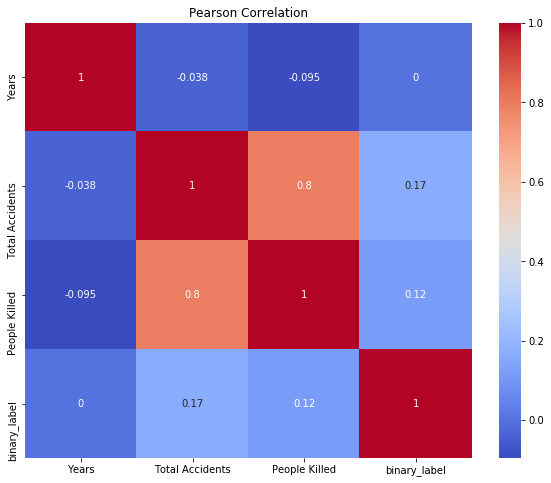

In [119]:
plt.figure(figsize=(10, 8))
sns.heatmap(r, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Pearson Correlation')

# Display the plot
plt.show()

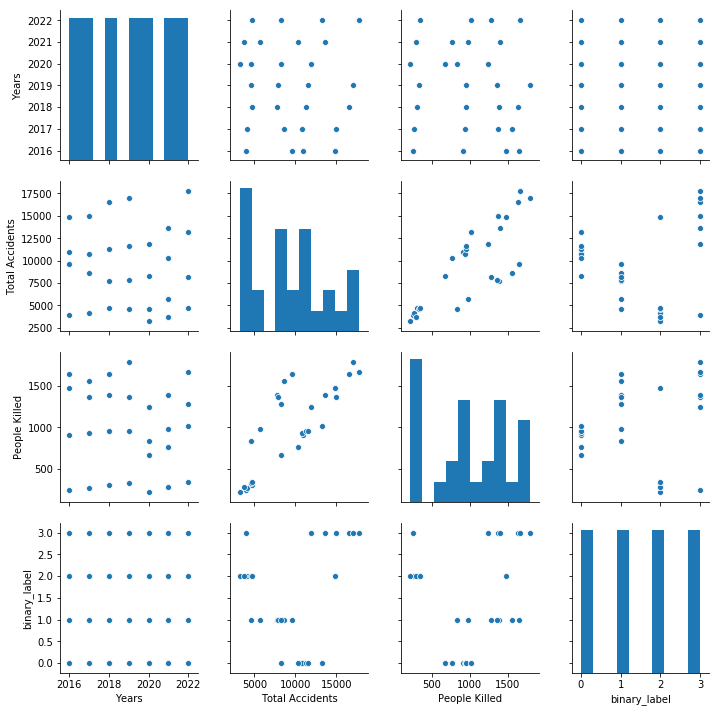

In [120]:
sns.pairplot(df1)
plt.show()

In [121]:
#Add a new column 'Next_Year_Number' to represent 'Number' for the next year
df1['Next_Year_Number'] = df1.groupby('Vehicles')['People Killed'].shift(-1)

# Create the binary target variable 'Killed' based on the comparison of 'Number' with 'Next_Year_Number'
df1['Killed'] = (df1['People Killed'] < df1['Next_Year_Number']).astype(int)
df1['Next_Year_Number'].fillna(0, inplace=True)
print(df1)

                       Vehicles  Years  Total Accidents  People Killed  \
0                   Two Wheeler   2016             3975            251   
1                 Three Wheeler   2016            14849           1474   
2                  Four Wheeler   2016            10975            914   
3   Other Heavy Loaded Vehicles   2016             9621           1648   
4                   Two Wheeler   2017            14967           1371   
5                 Three Wheeler   2017             4127            271   
6                  Four Wheeler   2017            10791            934   
7   Other Heavy Loaded Vehicles   2017             8595           1555   
8                   Two Wheeler   2018            16513           1640   
9                 Three Wheeler   2018             4652            312   
10                 Four Wheeler   2018            11248            957   
11  Other Heavy Loaded Vehicles   2018             7768           1394   
12                  Two Wheeler   2019

In [122]:
# Separate the features (X) and target variable (y)
X = df1[['Years','Total Accidents','People Killed','binary_label']]
y = df1['Killed']

In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [124]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [125]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.875


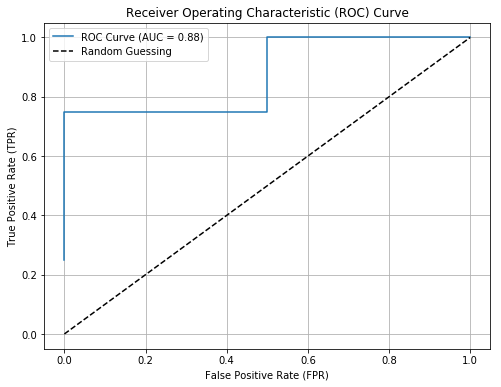

In [126]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1 1]
 [1 3]]


### Causes

In [175]:
data1 = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='causes')
print(data1)

                                              Causes  Years  Total Accidents  \
0                   Fault of driver of motor vehicle   2016            38189   
1                                   Fault of cyclist   2016                0   
2                   Fault of driver of other vehicle   2016                0   
3                               Fault of pedestrian    2016                0   
4                                 Fault of passenger   2016                0   
5    Defect in mechanical condition of motor vehicle   2016               11   
6                              Poor light condition    2016                0   
7                           Defect in road condition   2016                0   
8                        Result of weather condition   2016                0   
9                                Falling of boulders   2016                0   
10                           Neglect of civic bodies   2016                0   
11                                     S

In [176]:
category_column = data1['Causes']

label_encoder = LabelEncoder()
label_encoder.fit(category_column)

binary_encoded_data = label_encoder.transform(category_column)

data1['binary_label'] = binary_encoded_data
print(data1)

                                              Causes  Years  Total Accidents  \
0                   Fault of driver of motor vehicle   2016            38189   
1                                   Fault of cyclist   2016                0   
2                   Fault of driver of other vehicle   2016                0   
3                               Fault of pedestrian    2016                0   
4                                 Fault of passenger   2016                0   
5    Defect in mechanical condition of motor vehicle   2016               11   
6                              Poor light condition    2016                0   
7                           Defect in road condition   2016                0   
8                        Result of weather condition   2016                0   
9                                Falling of boulders   2016                0   
10                           Neglect of civic bodies   2016                0   
11                                     S

In [177]:
r = data1.corr(method='pearson')
print(r)

                    Years  Total Accidents  People Killed  binary_label
Years            1.000000        -0.006283      -0.016671      0.000000
Total Accidents -0.006283         1.000000       0.993672     -0.078517
People Killed   -0.016671         0.993672       1.000000     -0.069176
binary_label     0.000000        -0.078517      -0.069176      1.000000


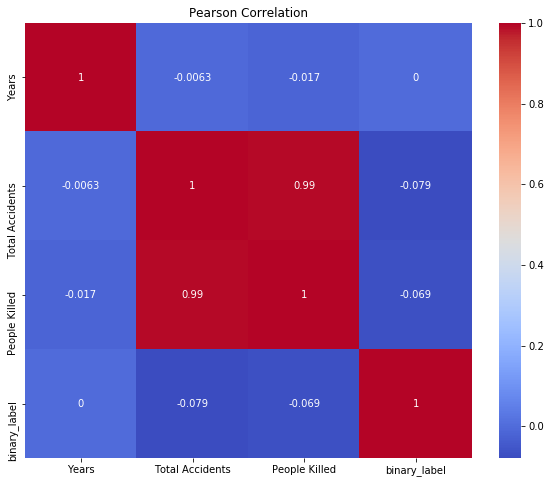

In [178]:
plt.figure(figsize=(10, 8))
sns.heatmap(r, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Pearson Correlation')

# Display the plot
plt.show()

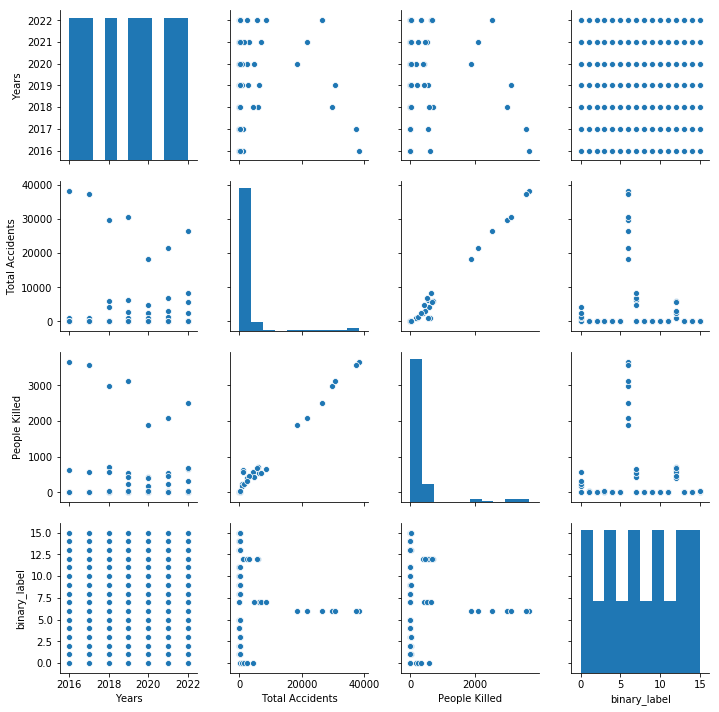

In [179]:
sns.pairplot(data1)
plt.show()

In [180]:
#Add a new column 'Next_Year_Number' to represent 'Number' for the next year
data1['Next_Year_Number'] = data1.groupby('Causes')['People Killed'].shift(-1)

# Create the binary target variable 'Arrested' based on the comparison of 'Number' with 'Next_Year_Number'
data1['Killed'] = (data1['People Killed'] < data1['Next_Year_Number']).astype(int)
data1['Next_Year_Number'].fillna(0, inplace=True)
print(data1)

                                              Causes  Years  Total Accidents  \
0                   Fault of driver of motor vehicle   2016            38189   
1                                   Fault of cyclist   2016                0   
2                   Fault of driver of other vehicle   2016                0   
3                               Fault of pedestrian    2016                0   
4                                 Fault of passenger   2016                0   
5    Defect in mechanical condition of motor vehicle   2016               11   
6                              Poor light condition    2016                0   
7                           Defect in road condition   2016                0   
8                        Result of weather condition   2016                0   
9                                Falling of boulders   2016                0   
10                           Neglect of civic bodies   2016                0   
11                                     S

In [181]:
# Separate the features (X) and target variable (y)
X = data1[['Total Accidents','People Killed','binary_label']]
y = data1['Killed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [182]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5652173913043478


In [183]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.4087301587301587


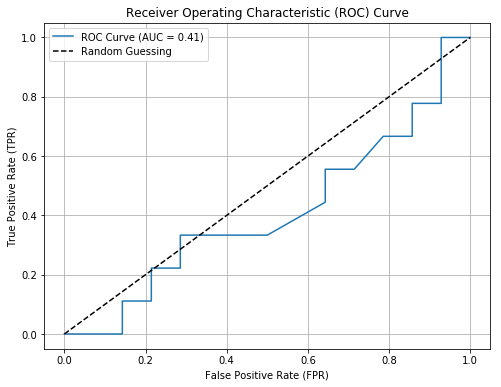

In [184]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [185]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[13  1]
 [ 9  0]]


### Causes_1

In [186]:
data1 = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='Sheet5')
print(data1)

                              Causes  Years  Total Accidents  People Killed
0   Fault of driver of motor vehicle   2016            38291           3666
1   Fault of driver of other vehicle   2016                0              0
2                      Other causes    2016             1098            619
3                    Cause not known   2016               31              2
4   Fault of driver of motor vehicle   2017            37320           3569
5   Fault of driver of other vehicle   2017                0              0
6                      Other causes    2017             1110            560
7                    Cause not known   2017               40              2
8   Fault of driver of motor vehicle   2018            29933           3010
9   Fault of driver of other vehicle   2018                0              0
10                     Other causes    2018             6058            711
11                   Cause not known   2018             4190            582
12  Fault of

In [187]:
category_column = data1['Causes']

label_encoder = LabelEncoder()
label_encoder.fit(category_column)

binary_encoded_data = label_encoder.transform(category_column)

data1['binary_label'] = binary_encoded_data
print(data1)

                              Causes  Years  Total Accidents  People Killed  \
0   Fault of driver of motor vehicle   2016            38291           3666   
1   Fault of driver of other vehicle   2016                0              0   
2                      Other causes    2016             1098            619   
3                    Cause not known   2016               31              2   
4   Fault of driver of motor vehicle   2017            37320           3569   
5   Fault of driver of other vehicle   2017                0              0   
6                      Other causes    2017             1110            560   
7                    Cause not known   2017               40              2   
8   Fault of driver of motor vehicle   2018            29933           3010   
9   Fault of driver of other vehicle   2018                0              0   
10                     Other causes    2018             6058            711   
11                   Cause not known   2018         

In [188]:
r = data1.corr(method='pearson')
print(r)

                    Years  Total Accidents  People Killed  binary_label
Years            1.000000        -0.015088      -0.041409      0.000000
Total Accidents -0.015088         1.000000       0.991525     -0.179839
People Killed   -0.041409         0.991525       1.000000     -0.134672
binary_label     0.000000        -0.179839      -0.134672      1.000000


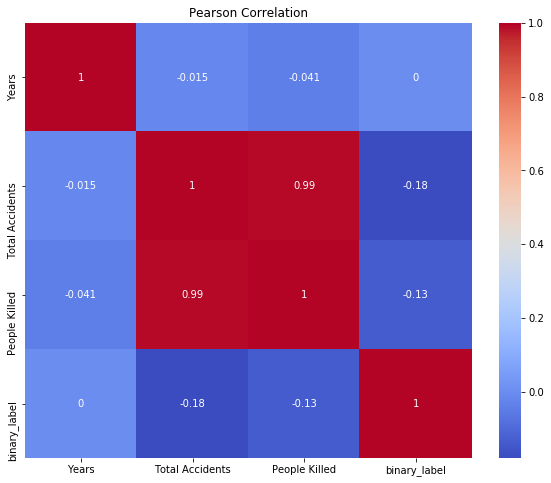

In [189]:
plt.figure(figsize=(10, 8))
sns.heatmap(r, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Pearson Correlation')

# Display the plot
plt.show()

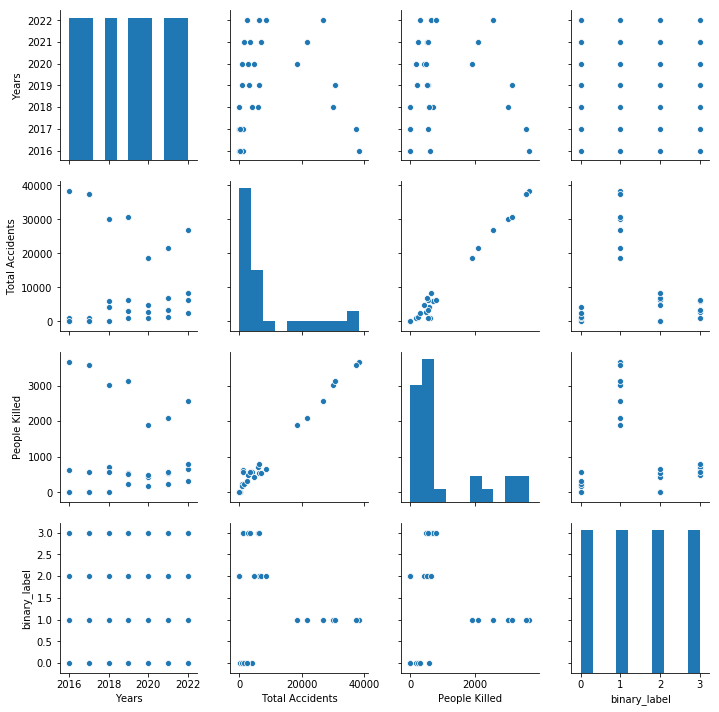

In [190]:
sns.pairplot(data1)
plt.show()

In [191]:
#Add a new column 'Next_Year_Number' to represent 'Number' for the next year
data1['Next_Year_Number'] = data1.groupby('Causes')['People Killed'].shift(-1)

# Create the binary target variable 'Arrested' based on the comparison of 'Number' with 'Next_Year_Number'
data1['Killed'] = (data1['People Killed'] < data1['Next_Year_Number']).astype(int)
data1['Next_Year_Number'].fillna(0, inplace=True)
print(data1)

                              Causes  Years  Total Accidents  People Killed  \
0   Fault of driver of motor vehicle   2016            38291           3666   
1   Fault of driver of other vehicle   2016                0              0   
2                      Other causes    2016             1098            619   
3                    Cause not known   2016               31              2   
4   Fault of driver of motor vehicle   2017            37320           3569   
5   Fault of driver of other vehicle   2017                0              0   
6                      Other causes    2017             1110            560   
7                    Cause not known   2017               40              2   
8   Fault of driver of motor vehicle   2018            29933           3010   
9   Fault of driver of other vehicle   2018                0              0   
10                     Other causes    2018             6058            711   
11                   Cause not known   2018         

In [192]:
# Separate the features (X) and target variable (y)
X = data1[['Total Accidents','People Killed','binary_label']]
y = data1['Killed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [193]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [194]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.5555555555555556


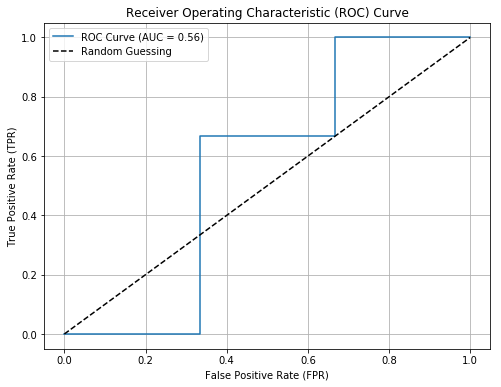

In [195]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [196]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3 0]
 [3 0]]


### Time

In [139]:
data2 = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='time')
print(data2)

                          Time  Years  Total Accidents  People Killed
0      06.00 to 9.00 hrs (Day)   2016             6277            605
1     09.00 to 12.00 hrs (Day)   2016             6987            613
2     12.00 to 15.00 hrs (Day)   2016             6632            645
3     15.00 to 18.00 hrs (Day)   2016             8440            736
4   18.00 to 21.00 hrs (Night)   2016             6904            884
5   21.00 to 24.00 hrs (Night)   2016             1608            309
6    00.00 to 3.00 hrs (Night)   2016              679            171
7    03.00 to 6.00 hrs (Night)   2016             1736            275
8                Un-known time   2016              157             49
9      06.00 to 9.00 hrs (Day)   2017             6165            548
10    09.00 to 12.00 hrs (Day)   2017             6871            601
11    12.00 to 15.00 hrs (Day)   2017             6211            591
12    15.00 to 18.00 hrs (Day)   2017             8056            697
13  18.00 to 21.00 h

In [140]:
category_column = data2['Time']

label_encoder = LabelEncoder()
label_encoder.fit(category_column)

binary_encoded_data = label_encoder.transform(category_column)

data2['binary_label'] = binary_encoded_data
print(data2)

                          Time  Years  Total Accidents  People Killed  \
0      06.00 to 9.00 hrs (Day)   2016             6277            605   
1     09.00 to 12.00 hrs (Day)   2016             6987            613   
2     12.00 to 15.00 hrs (Day)   2016             6632            645   
3     15.00 to 18.00 hrs (Day)   2016             8440            736   
4   18.00 to 21.00 hrs (Night)   2016             6904            884   
5   21.00 to 24.00 hrs (Night)   2016             1608            309   
6    00.00 to 3.00 hrs (Night)   2016              679            171   
7    03.00 to 6.00 hrs (Night)   2016             1736            275   
8                Un-known time   2016              157             49   
9      06.00 to 9.00 hrs (Day)   2017             6165            548   
10    09.00 to 12.00 hrs (Day)   2017             6871            601   
11    12.00 to 15.00 hrs (Day)   2017             6211            591   
12    15.00 to 18.00 hrs (Day)   2017             8

In [141]:
r = data2.corr(method='pearson')
print(r)

                    Years  Total Accidents  People Killed  binary_label
Years            1.000000        -0.024473      -0.080513      0.000000
Total Accidents -0.024473         1.000000       0.929616      0.114632
People Killed   -0.080513         0.929616       1.000000      0.152021
binary_label     0.000000         0.114632       0.152021      1.000000


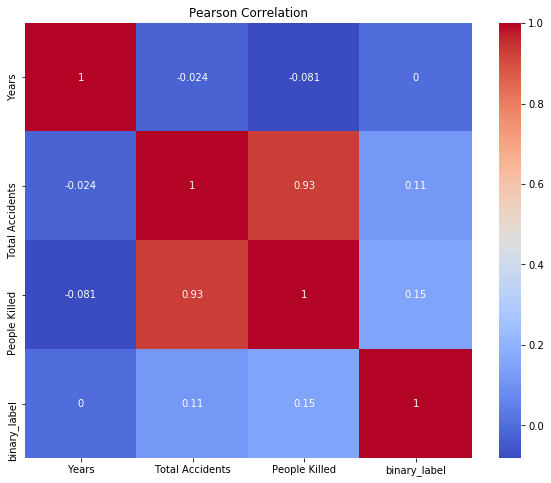

In [142]:
plt.figure(figsize=(10, 8))
sns.heatmap(r, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Pearson Correlation')

# Display the plot
plt.show()

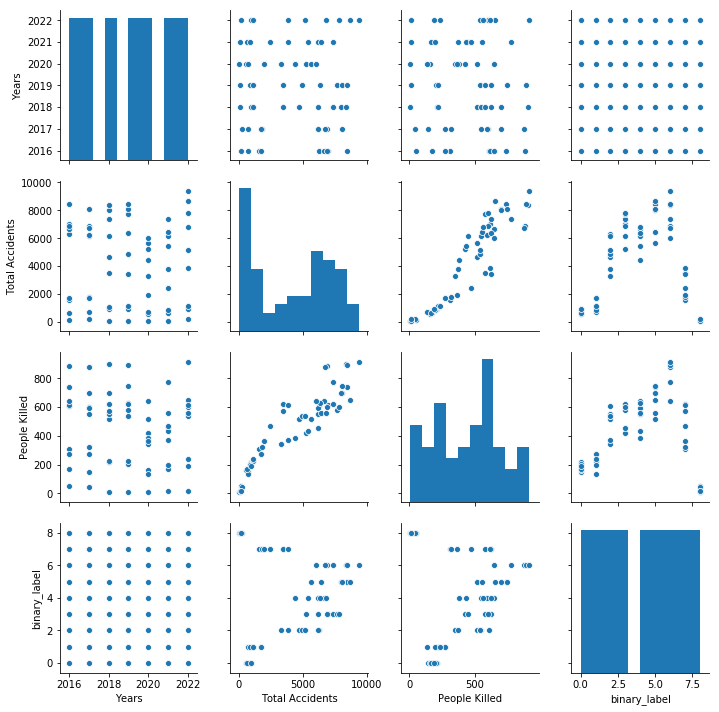

In [143]:
sns.pairplot(data2)
plt.show()

In [144]:
#Add a new column 'Next_Year_Number' to represent 'Number' for the next year
data2['Next_Year_Number'] = data2.groupby('Time')['People Killed'].shift(-1)

# Create the binary target variable 'Arrested' based on the comparison of 'Number' with 'Next_Year_Number'
data2['Killed'] = (data2['People Killed'] < data2['Next_Year_Number']).astype(int)
data2['Next_Year_Number'].fillna(0, inplace=True)
print(data2)

                          Time  Years  Total Accidents  People Killed  \
0      06.00 to 9.00 hrs (Day)   2016             6277            605   
1     09.00 to 12.00 hrs (Day)   2016             6987            613   
2     12.00 to 15.00 hrs (Day)   2016             6632            645   
3     15.00 to 18.00 hrs (Day)   2016             8440            736   
4   18.00 to 21.00 hrs (Night)   2016             6904            884   
5   21.00 to 24.00 hrs (Night)   2016             1608            309   
6    00.00 to 3.00 hrs (Night)   2016              679            171   
7    03.00 to 6.00 hrs (Night)   2016             1736            275   
8                Un-known time   2016              157             49   
9      06.00 to 9.00 hrs (Day)   2017             6165            548   
10    09.00 to 12.00 hrs (Day)   2017             6871            601   
11    12.00 to 15.00 hrs (Day)   2017             6211            591   
12    15.00 to 18.00 hrs (Day)   2017             8

In [145]:
# Separate the features (X) and target variable (y)
X = data2[['Total Accidents','People Killed','binary_label']]
y = data2['Killed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [146]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6923076923076923


In [147]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.6749999999999999


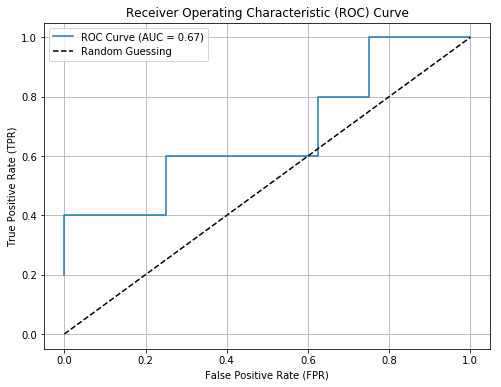

In [148]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8 0]
 [4 1]]


### Roads

In [150]:
df2 = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='roads')
print(df2)

               Roads  Years  Total Accidents  People Killed
0      State Highway   2016             9209           1263
1   National Highway   2016             7135            885
2         Other Road   2016            23076           2139
3      State Highway   2017             8993           1309
4   National Highway   2017             7044            837
5         Other Road   2017            22433           1985
6      State Highway   2018             9161           1248
7   National Highway   2018             7552            876
8         Other Road   2018            23468           2179
9      State Highway   2019             8097            979
10  National Highway   2019             9001           1216
11        Other Road   2019            24013           2245
12     State Highway   2020             5876            629
13  National Highway   2020             6247            849
14        Other Road   2020            15754           1501
15     State Highway   2021             

In [151]:
category_column = df2['Roads']

label_encoder = LabelEncoder()
label_encoder.fit(category_column)

binary_encoded_data = label_encoder.transform(category_column)

df2['binary_label'] = binary_encoded_data
print(df2)

               Roads  Years  Total Accidents  People Killed  binary_label
0      State Highway   2016             9209           1263             2
1   National Highway   2016             7135            885             0
2         Other Road   2016            23076           2139             1
3      State Highway   2017             8993           1309             2
4   National Highway   2017             7044            837             0
5         Other Road   2017            22433           1985             1
6      State Highway   2018             9161           1248             2
7   National Highway   2018             7552            876             0
8         Other Road   2018            23468           2179             1
9      State Highway   2019             8097            979             2
10  National Highway   2019             9001           1216             0
11        Other Road   2019            24013           2245             1
12     State Highway   2020           

In [152]:
r = df2.corr(method='pearson')
print(r)

                    Years  Total Accidents  People Killed  binary_label
Years            1.000000        -0.030545      -0.120811      0.000000
Total Accidents -0.030545         1.000000       0.976508      0.047012
People Killed   -0.120811         0.976508       1.000000      0.125078
binary_label     0.000000         0.047012       0.125078      1.000000


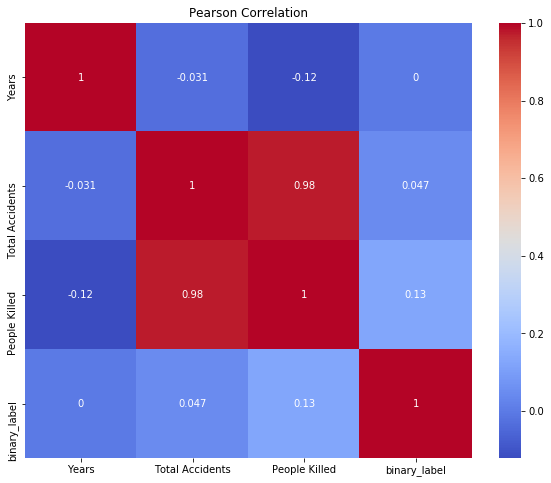

In [154]:
plt.figure(figsize=(10, 8))
sns.heatmap(r, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Pearson Correlation')

# Display the plot
plt.show()

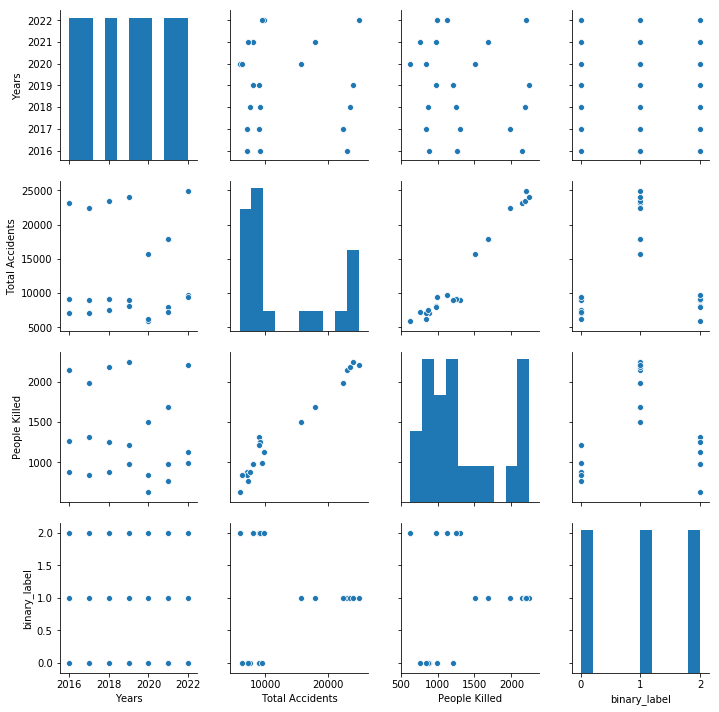

In [155]:
sns.pairplot(df2)
plt.show()

In [156]:
#Add a new column 'Next_Year_Number' to represent 'Number' for the next year
df2['Next_Year_Number'] = df2.groupby('Roads')['People Killed'].shift(-1)

# Create the binary target variable 'Arrested' based on the comparison of 'Number' with 'Next_Year_Number'
df2['Killed'] = (df2['People Killed'] < df2['Next_Year_Number']).astype(int)
df2['Next_Year_Number'].fillna(0, inplace=True)
print(df2)

               Roads  Years  Total Accidents  People Killed  binary_label  \
0      State Highway   2016             9209           1263             2   
1   National Highway   2016             7135            885             0   
2         Other Road   2016            23076           2139             1   
3      State Highway   2017             8993           1309             2   
4   National Highway   2017             7044            837             0   
5         Other Road   2017            22433           1985             1   
6      State Highway   2018             9161           1248             2   
7   National Highway   2018             7552            876             0   
8         Other Road   2018            23468           2179             1   
9      State Highway   2019             8097            979             2   
10  National Highway   2019             9001           1216             0   
11        Other Road   2019            24013           2245             1   

In [157]:
# Separate the features (X) and target variable (y)
X = df2[['Total Accidents','People Killed','binary_label']]
y = df2['Killed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

In [158]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2


In [159]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.5


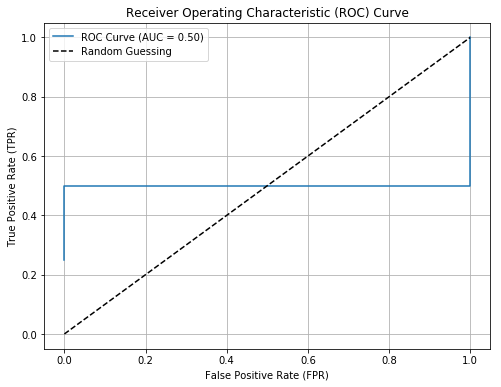

In [160]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1 0]
 [4 0]]


### Seasons and Zones

In [64]:
data = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='feature_mapping')
print(data)

    Total Accidents_seasons  Total Accidents_zones  People Killed_seasons  \
0                     13313                  16989                   1542   
1                     12826                  15656                   1322   
2                     13281                   6775                   1423   
3                     12979                  17051                   1423   
4                     12268                  14844                   1323   
5                     13233                   6575                   1385   
6                     13799                  18129                   1568   
7                     12441                  15237                   1263   
8                     13941                   6815                   1472   
9                     14257                  18062                   1668   
10                    12608                  15725                   1271   
11                    14246                   7324                   1501   

In [65]:
# Exclude the 'Years' columns
df = data.drop(columns=['Years_0', 'Years_1', 'Years_2', 'Years_3', 'Years_4', 'Years_5', 'Years_6', 'Zones_encoded', 'Seasons_encoded'])

# Perform correlation analysis
correlation = df.corr()

# Print the correlation matrix
print(correlation)

                         Total Accidents_seasons  Total Accidents_zones  \
Total Accidents_seasons                 1.000000               0.054479   
Total Accidents_zones                   0.054479               1.000000   
People Killed_seasons                   0.932375               0.156808   
People Killed_zones                     0.043966               0.945840   

                         People Killed_seasons  People Killed_zones  
Total Accidents_seasons               0.932375             0.043966  
Total Accidents_zones                 0.156808             0.945840  
People Killed_seasons                 1.000000             0.197636  
People Killed_zones                   0.197636             1.000000  


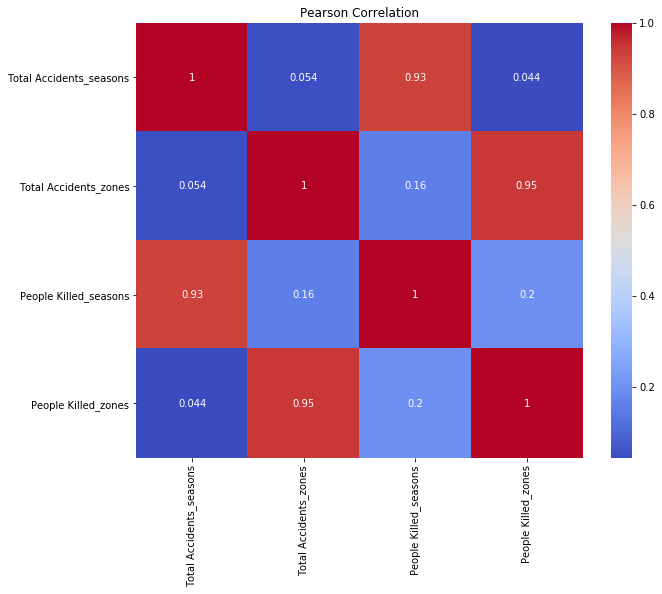

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Pearson Correlation')

# Display the plot
plt.show()

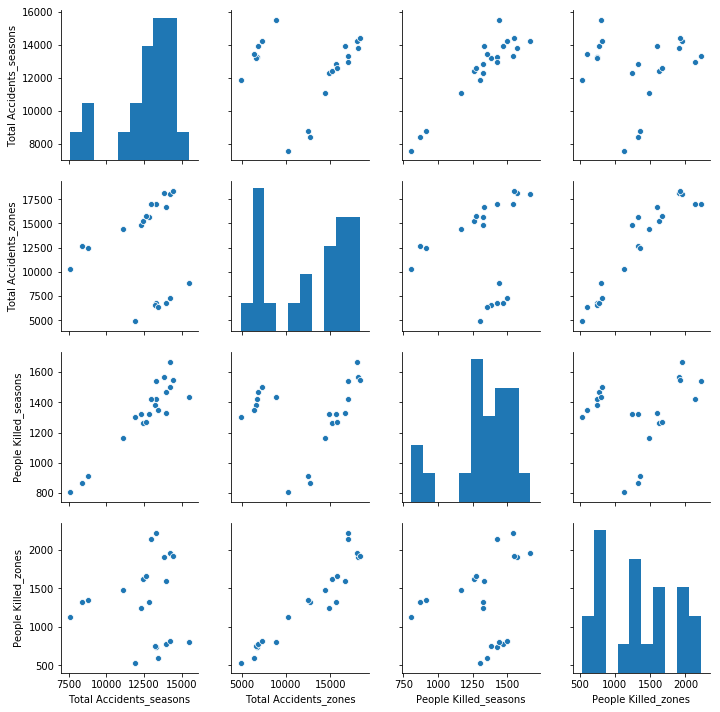

In [67]:
sns.pairplot(df)
plt.show()

In [49]:
# Shift the Total Accidents_seasons and People Killed_seasons columns to represent the next year's values
data['Total Accidents_next_year'] = data['Total Accidents_seasons'].shift(-1)
data['People Killed_next_year'] = data['People Killed_seasons'].shift(-1)

# Create a new column 'Target' to represent if the number of accidents and people killed increased or not compared to the next year
data['Target'] = (data['Total Accidents_next_year'] > data['Total Accidents_seasons']) & (data['People Killed_next_year'] > data['People Killed_seasons'])

In [50]:
X = data[['Total Accidents_seasons', 'People Killed_seasons']].values
y = data['Target'].astype(int).values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6


In [58]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.8333333333333333


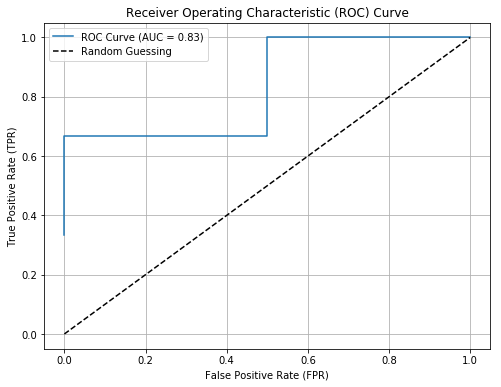

In [59]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2 0]
 [2 1]]


In [68]:
# Shift the Total Accidents_seasons and People Killed_seasons columns to represent the next year's values
data['Total Accidents_next_year1'] = data['Total Accidents_zones'].shift(-1)
data['People Killed_next_year1'] = data['People Killed_zones'].shift(-1)

# Create a new column 'Target' to represent if the number of accidents and people killed increased or not compared to the next year
data['Target1'] = (data['Total Accidents_next_year1'] > data['Total Accidents_zones']) & (data['People Killed_next_year1'] > data['People Killed_zones'])

In [69]:
X = data[['Total Accidents_zones', 'People Killed_zones']].values
y = data['Target1'].astype(int).values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6


In [71]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.8333333333333334


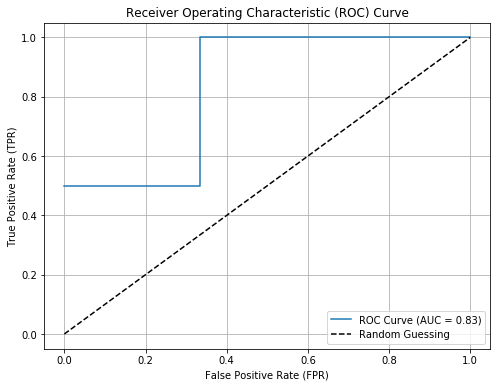

In [73]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3 0]
 [2 0]]
